In [2]:
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [80]:
p = Path("./Dataset/")
dirs = p.glob("*")
image_data = []
labels = []
label_dict = {"Pikachu":0, "Bulbasaur":1, "Meowth":2}
for folder_name in dirs:
    name = folder_name.name
    cnt = 0
    for image_path in folder_name.glob("*.jpg"):
        img = cv2.imread(str(image_path))
        if img is None:
            print(f"Failed to load: {image_path}")
            continue
        img = cv2.resize(img, (40, 40))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img, dtype=np.float32)
        image_data.append(img_array)
        labels.append(label_dict[name])
        cnt += 1

    print(cnt)

176
70
199


In [81]:
print(len(image_data))
print(len(labels))
X = np.array(image_data)
Y = np.array(labels)
X = X /255.0

445
445


In [82]:
def drawImg(img,labels):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

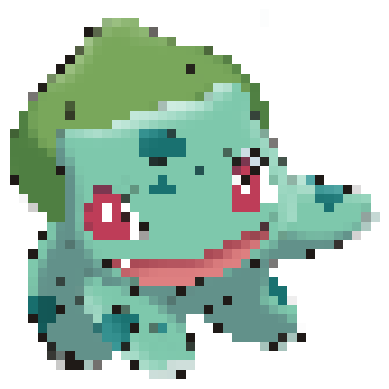

In [83]:
drawImg(X[0] , Y[0])

In [84]:
import random 
random.seed(10)
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

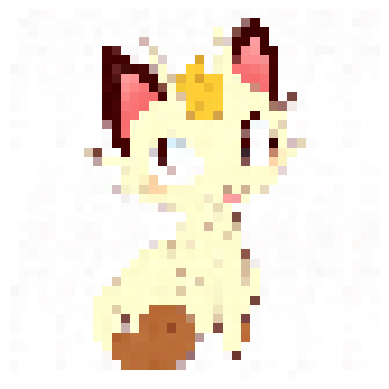

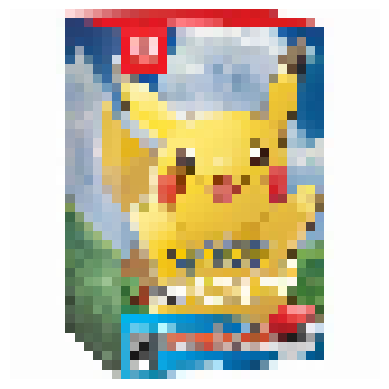

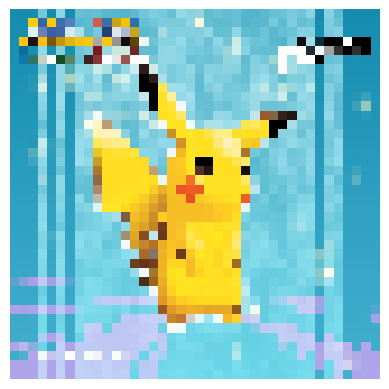

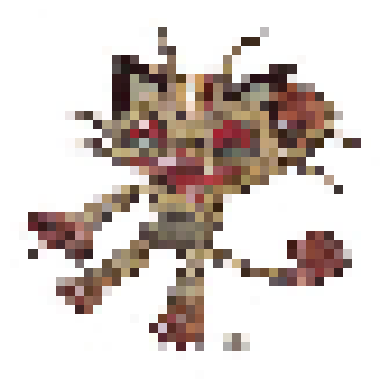

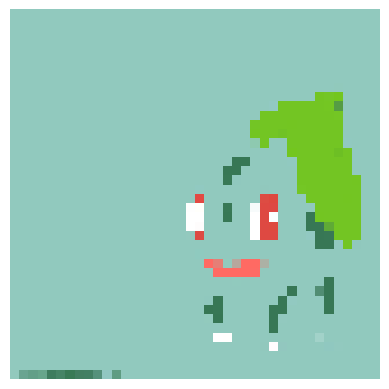

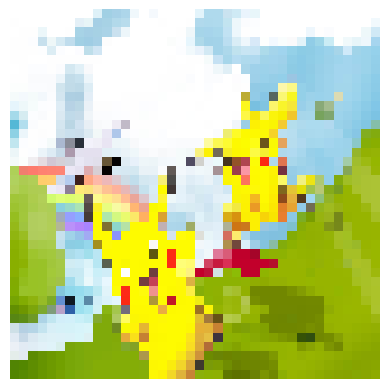

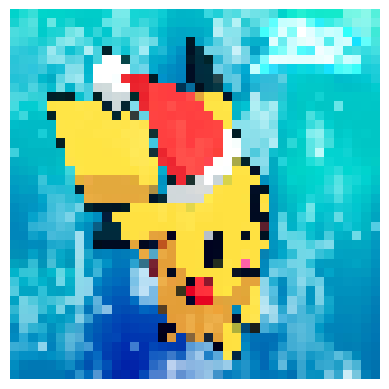

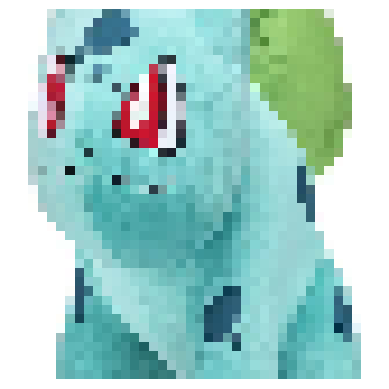

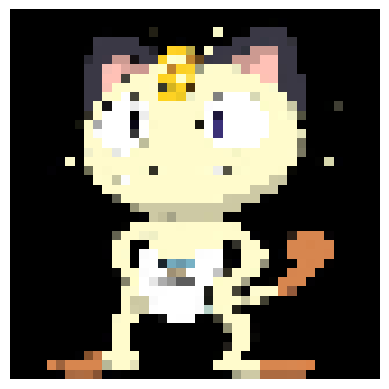

In [85]:
for i in range(1,10):
    drawImg(X[i],Y[i])

In [86]:
split = int(X.shape[0]*.8)
X_ = np.array(X)
Y_ = np.array(Y)
X = X_[:split,:]
Y = Y_[:split]
X_test = X_[split:,:]
Y_test = Y_[split:]
print(X.shape,Y.shape,X_test.shape,Y_test.shape)

(356, 40, 40, 3) (356,) (89, 40, 40, 3) (89,)


In [101]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        self.model = model
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        z3 = np.dot(a2,W3) + b3
        y_ = sigmoid(z3)
        self.activation_output = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_output
        m = x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot(a3.T,delta3)
        db1 = np.sum(delta3,axis=0)/float(m)
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a2.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        delta1 = (1-np.square(a1))*np.dot(delta2,W3.T)
        dw1 = np.dot(a2.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)

        self.model['W1'] -= learning_rate*dw1
        self.model['B1'] -= learning_rate*db1
        self.model['W2'] -= learning_rate*dw2
        self.model['B2'] -= learning_rate*db2
        self.model['W3'] -= learning_rate*dw3
        self.model['B3'] -= learning_rate*db3

    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_output

        print("W1",W1.shape)
        print("A1",a1.shape)
        print("W2",W2.shape)
        print("A2",a2.shape)
        print("W3",W3.shape)
        print("A3",y_.shape)
def sigmoid(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [102]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
def oneHot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [103]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    classes = len(np.unique(Y))
    Y_oht = oneHot(Y,classes)
    for i in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_oht,Y_)
        model.backward(X,Y_oht,learning_rate)
        training_loss.append(1)
        if(logs and i%50==0):
            print("Epoch %d Loss %.4f"%(i,l))
    return training_loss

In [104]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3)

In [105]:
print(X.shape)

(356, 4800)


In [106]:
X = X.reshape(X.shape[0],-1)
print(X.shape)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)

(356, 4800)
(89, 4800)


In [107]:
l = train(X,Y,model,500,0.0002)

NameError: name 'a3' is not defined